Decision Tree Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

In [96]:
import pandas as pd
import numpy as np

drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [98]:
drug_df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [99]:
def convert_sex(x):
    if x == 'F':
        return 0
    elif x == 'M':
        return 1

def convert_BP(x):
    if x == 'HIGH':
        return 2
    if x == 'NORMAL':
        return 1
    if x == 'LOW':
        return 0

def convert_CH(x):
    if x == 'HIGH':
        return 1
    if x == 'NORMAL':
        return 0

In [100]:
drug_df['convert_gender'] = drug_df['Sex'].apply(convert_sex)
drug_df['convert_BP'] = drug_df['BP'].apply(convert_BP)
drug_df['convert_Cholesterol'] = drug_df['Cholesterol'].apply(convert_CH)
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,convert_gender,convert_BP,convert_Cholesterol
0,23,F,HIGH,HIGH,25.355,drugY,0,2,1
1,47,M,LOW,HIGH,13.093,drugC,1,0,1
2,47,M,LOW,HIGH,10.114,drugC,1,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,0,1,1
4,61,F,LOW,HIGH,18.043,drugY,0,0,1
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0,0,1
196,16,M,LOW,HIGH,12.006,drugC,1,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,1,1,1
198,23,M,NORMAL,NORMAL,14.020,drugX,1,1,0


In [101]:
drug_df1 = drug_df[['Age','convert_gender','convert_BP','convert_Cholesterol','Na_to_K','Drug']]
drug_df1

,Age,convert_gender,convert_BP,convert_Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [102]:
feature = drug_df1.iloc[:, :-1]
target = drug_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(feature, target, test_size=0.2, random_state=124)

In [103]:
feature['Age']

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

In [104]:
target.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [105]:
def convert_target(x):
    if x == 'drugY':
        return 0
    if x == 'drugX':
        return 1
    if x == 'drugA':
        return 2
    if x == 'drugC':
        return 3
    if x == 'drugB':
        return 4

In [106]:
drug_df1['Drug'] = drug_df1['Drug'].apply(convert_target)
drug_df1

C:\Users\kangh\AppData\Local\Temp\ipykernel_19012\2979597932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df1['Drug'] = drug_df1['Drug'].apply(convert_target)


,Age,convert_gender,convert_BP,convert_Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,3
2,47,1,0,1,10.114,3
3,28,0,1,1,7.798,1
4,61,0,0,1,18.043,0
...,...,...,...,...,...,...
195,56,0,0,1,11.567,3
196,16,1,0,1,12.006,3
197,52,1,1,1,9.894,1
198,23,1,1,0,14.020,1


이상치 제거

In [107]:
Q1 = drug_df1.describe().T.loc['Na_to_K', '25%']
Q3 = drug_df1.describe().T.loc['Na_to_K', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound<0:
    lower_bound = 0

print(f'{lower_bound}~{upper_bound}')

0~32.78175


In [108]:
drug_df1 = drug_df1[drug_df1['Na_to_K'] <= upper_bound]

In [109]:
drug_df1[drug_df1['Na_to_K']<lower_bound]

,Age,convert_gender,convert_BP,convert_Cholesterol,Na_to_K,Drug


In [110]:
drug_df1

,Age,convert_gender,convert_BP,convert_Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,3
2,47,1,0,1,10.114,3
3,28,0,1,1,7.798,1
4,61,0,0,1,18.043,0
...,...,...,...,...,...,...
195,56,0,0,1,11.567,3
196,16,1,0,1,12.006,3
197,52,1,1,1,9.894,1
198,23,1,1,0,14.020,1


In [111]:
Q1 = drug_df1.describe().T.loc['Age', '25%']
Q3 = drug_df1.describe().T.loc['Age', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound<0:
    lower_bound = 0

print(f'{lower_bound}~{upper_bound}')

0~98.5


In [112]:
drug_df1 = drug_df1[drug_df1['Age'] <= upper_bound]

In [113]:
drug_df1

,Age,convert_gender,convert_BP,convert_Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,0
1,47,1,0,1,13.093,3
2,47,1,0,1,10.114,3
3,28,0,1,1,7.798,1
4,61,0,0,1,18.043,0
...,...,...,...,...,...,...
195,56,0,0,1,11.567,3
196,16,1,0,1,12.006,3
197,52,1,1,1,9.894,1
198,23,1,1,0,14.020,1


In [39]:
target = drug_df1.Drug.transpose().values
target

array([0, 3, 3, 1, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 1, 0, 1, 1, 2, 1, 1, 1, 0, 4, 0, 1,
       1, 1, 2, 3, 0, 0, 0, 1, 0, 0, 4, 3, 4, 0, 1, 0, 0, 2, 0, 1, 4, 0,
       2, 1, 0, 0, 4, 0, 1, 0, 0, 0, 2, 0, 2, 1, 4, 1, 3, 2, 3, 4, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 3, 1, 0, 1, 1, 0, 4, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 4, 2, 4, 1, 2, 0, 4, 0, 2, 1, 1, 2, 1, 3, 2, 4, 1, 1,
       0, 3, 2, 0, 3, 1, 1, 4, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 3, 0, 3, 3, 1,
       1, 1], dtype=int64)

In [40]:
target_names =np.array(['drugY','drugX','drugA','drugC','drugB']) 
target_names

array(['drugY', 'drugX', 'drugA', 'drugC', 'drugB'], dtype='<U5')

In [42]:
feature_names = ['Age','convert_gender','convert_BP','convert_Cholesterol','Na_to_K']
feature_names

['Age', 'convert_gender', 'convert_BP', 'convert_Cholesterol', 'Na_to_K']

In [29]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))


1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = \
train_test_

In [43]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file='./images/drug_dtc01.dot',
    class_names=target_names,
    feature_names=feature_names,
    impurity=True,
    filled=True
)

In [44]:
import graphviz

with open('./images/drug_dtc01.dot') as f:
    drug_dtc01 = f.read()

drug_dtc01_graph = graphviz.Source(drug_dtc01)

In [45]:
drug_dtc01_graph.render(filename='drug_dtc01', directory='./images', format='png')

'images\\drug_dtc01.png'

<img src='./images/drug_dtc01.png'>

In [60]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [56]:
feature

,Age,convert_gender,convert_BP,convert_Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043
...,...,...,...,...,...
195,56,0,0,1,11.567
196,16,1,0,1,12.006
197,52,1,1,1,9.894
198,23,1,1,0,14.020


In [57]:
target

array([0, 3, 3, 1, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 1, 0, 1, 1, 2, 1, 1, 1, 0, 4, 0, 1,
       1, 1, 2, 3, 0, 0, 0, 1, 0, 0, 4, 3, 4, 0, 1, 0, 0, 2, 0, 1, 4, 0,
       2, 1, 0, 0, 4, 0, 1, 0, 0, 0, 2, 0, 2, 1, 4, 1, 3, 2, 3, 4, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 3, 1, 0, 1, 1, 0, 4, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 4, 2, 4, 1, 2, 0, 4, 0, 2, 1, 1, 2, 1, 3, 2, 4, 1, 1,
       0, 3, 2, 0, 3, 1, 1, 4, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 3, 0, 3, 3, 1,
       1, 1], dtype=int64)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 5 features as input.

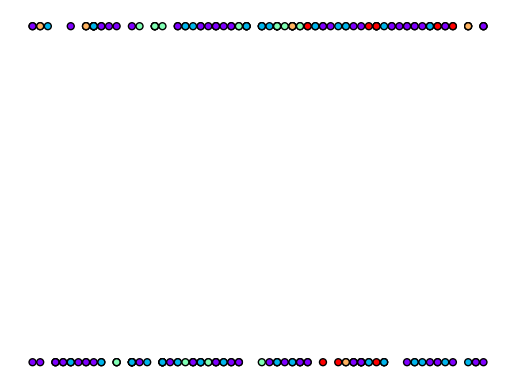

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

visualize_boundary(dtc, feature, target)